In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# 재현 가능성을 위한 랜덤 시드 설정
np.random.seed(42)

# **지정된 나이 범위에 따라 10명의 남성과 10명의 여성을 위한 무작위 데이터 생성**
# **단순화를 위해 나이는 남성과 역성이 같은 내에서 설정 (20-30세)**
# Height in cm (men: 165-200, women: 150-180)
# Weight in kg (men: 60-100, women: 45-80)


In [ ]:
#Men's data
men_ages = np.random.randint(20, 31, size=10)
men_heights = np.random.randint(165, 201, size=10)
men_weights = np.random.randint(60, 101, size=10)
men_gender = np.zeros(10)

#Women's data
women_ages = np.random.randint(20, 31, size=10)
women_heights = np.random.randint(150, 181, size=10)
women_weights = np.random.randint(45, 81, size=10)
women_gender = np.ones(10)

# **데이터 결합**
# 남성과 여성의 데이터를 단일 데이터 셋으로 결합
# 남성과 여성의 나이를 하나의 배열로 결합
# 수행결과 20개의 요소를 가진 배열 생성, 첫 10개는 남성의 나이, 다음 10개는 여성의 나이

In [ ]:
data = np.column_stack((
    np.concatenate([men_ages, women_ages]),
    np.concatenate([men_heights, women_heights]),
    np.concatenate([men_weights, women_weights]),
    np.concatenate([men_gender, women_gender]),
))

In [ ]:
print(data)

In [ ]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

In [ ]:
print(data_normalized)

# **KMeans 클러스터링 수행**
# 나이, 키, 몸무게 사용하여 KMeans  클러스터링 적용
# 클러스터 수 4개
# 난수 생성을 제어하기 위한 시드 값을 설정. 클러스터링 결과 재현 가능
# data_normalized 데이터셋 사용, 데이터의 처음 3개 열 (나이, 키, 몸무게)을 사용하여 클러스터링을 수행

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_normalized[:,:3])

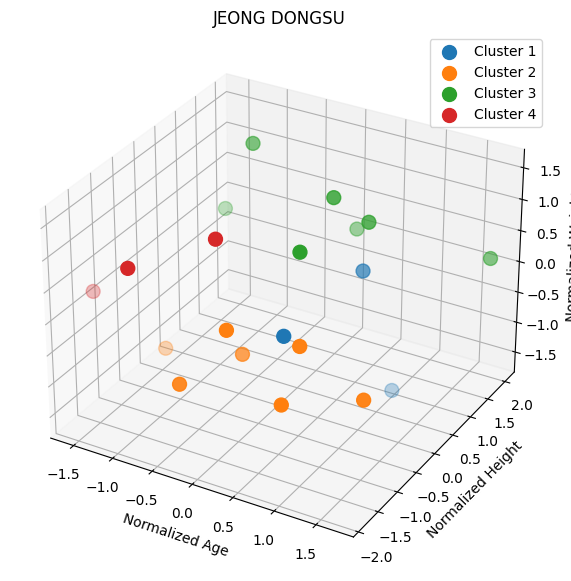

In [ ]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

for i in range(kmeans.n_clusters):
    cluster_members = kmeans.labels_ == i
    ax.scatter(data_normalized[cluster_members, 0], data_normalized[cluster_members, 1], data_normalized[cluster_members, 2],
                label=f'Cluster {i+1}', s=100)

ax.set_title('JEONG DONGSU')
ax.set_xlabel('Normalized Age')
ax.set_ylabel('Normalized Height')
ax.set_zlabel('Normalized Weight')
plt.legend()
plt.show()

# 클러스터링 후 각 데이터 포인트에 성별 라벨링
# 나이, 키, 몸무게를 기준으로 한 클러스터링 결과를 3D로 시각화
# 성별에 따라 다른 색상으로 각 점을 표시
# 남성 데이터는 파란색으로, 여성 데이터는 자홍색으로 표시

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


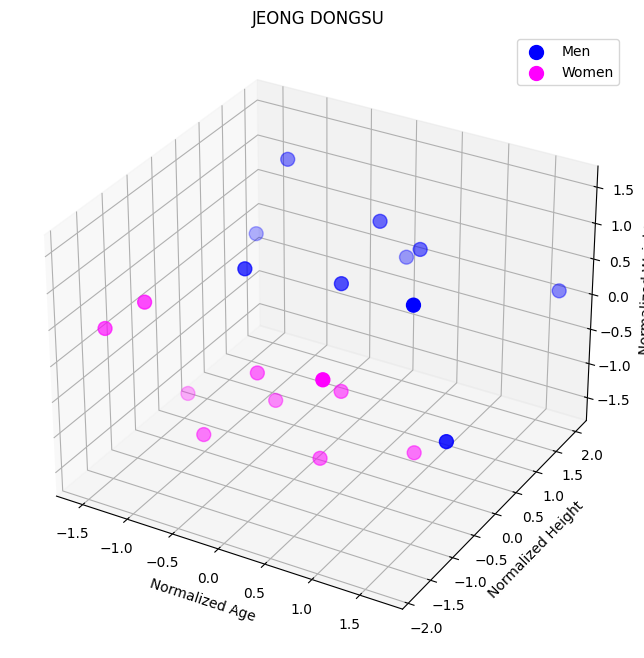

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_normalized[:,:3])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

men = data[:, 3] == 0
women = data[:, 3] == 1

ax.scatter(data_normalized[men, 0], data_normalized[men, 1], data_normalized[men, 2],
           c='blue', label='Men', s=100)

ax.scatter(data_normalized[women, 0], data_normalized[women, 1], data_normalized[women, 2],
           c='magenta', label='Women', s=100)

ax.set_title('JEONG DONGSU')
ax.set_xlabel('Normalized Age')
ax.set_ylabel('Normalized Height')
ax.set_zlabel('Normalized Weight')
ax.legend()
plt.show()